<a href="https://colab.research.google.com/github/petergchang/proximal_jax/blob/main/proximal_jax_notepad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from itertools import product

import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
from jax.numpy.linalg import norm
from scipy.optimize import fmin

# 1. Introduction

In [92]:
# Example of convex function
def convex_fn1(x):
    """ Simple convex function R2->R
    """
    assert x.shape == (2,)
    return jnp.log(1 - x[0]**2 + x[1])

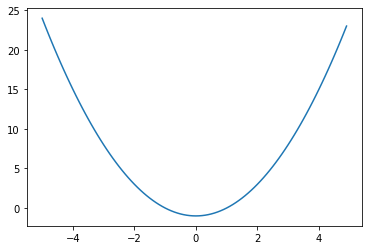

In [96]:
x = jnp.arange(-5, 5, 0.1)
y = jnp.arange(-5, 5, 0.1)
domain = lambda x: x**2 - 1

# Plot the domain boundary
plt.plot(x, domain(x));

In [101]:
XX, YY = jnp.meshgrid(x, y)
print(jnp.array([x, y]).shape)
output = vmap(convex_fn1)(jnp.array([x, y]))

(2, 100)


AssertionError: ignored

In [82]:
output

DeviceArray([800, 724, 656, 596, 544, 500, 464, 436, 416, 404, 400, 404,
             416, 436, 464, 500, 544, 596, 656, 724, 724, 648, 580, 520,
             468, 424, 388, 360, 340, 328, 324, 328, 340, 360, 388, 424,
             468, 520, 580, 648, 656, 580, 512, 452, 400, 356, 320, 292,
             272, 260, 256, 260, 272, 292, 320, 356, 400, 452, 512, 580,
             596, 520, 452, 392, 340, 296, 260, 232, 212, 200, 196, 200,
             212, 232, 260, 296, 340, 392, 452, 520, 544, 468, 400, 340,
             288, 244, 208, 180, 160, 148, 144, 148, 160, 180, 208, 244,
             288, 340, 400, 468, 500, 424, 356, 296, 244, 200, 164, 136,
             116, 104, 100, 104, 116, 136, 164, 200, 244, 296, 356, 424,
             464, 388, 320, 260, 208, 164, 128, 100,  80,  68,  64,  68,
              80, 100, 128, 164, 208, 260, 320, 388, 436, 360, 292, 232,
             180, 136, 100,  72,  52,  40,  36,  40,  52,  72, 100, 136,
             180, 232, 292, 360, 416, 340, 272, 212

In [48]:
# argmin of a function
def fn_argmin(fn, initial_guess=0.0, fp_digits=2):
    argmin = round(fmin(fn, initial_guess, disp=False)[0], fp_digits)
    return argmin

In [52]:
# Define general proximal operator
def proximal_operator(fn, v, lamb=1):
    new_fn = lambda x: fn(x) + 1/(2*lamb) * norm(x-v)
    return fn_argmin(new_fn)

In [53]:
proximal_operator(convex_fn1, 1)

0.25

In [57]:
x = jnp.array([1,2,3])
x.shape == (3,)

True